<h1><center>CREDIT CARD PAYMENTS ANALYSIS</center></h1>

<h2><center>Table of Content</center></h2>

- [1. Libraries and Constants](#1)
- [2. Getting the Tables](#2)
- [3. Analyzing credit_card_balance.csv Table](#3)
    - [3.1 Table Information](#3.1)
    - [3.2 Missing Values](#3.2)
    - [3.3 Univariate Analysis](#3.3)
        - [3.3.1 Analyzing the SK_ID_PREV Variable](#3.3.1)
        - [3.3.2 Analyzing the SK_ID_CURR Variable](#3.3.2)
        - [3.3.3 Analyzing the MONTHS_BALANCE Variable](#3.3.3)
        - [3.3.4 Analyzing the AMT_BALANCE Variable](#3.3.4)
        - [3.3.5 Analyzing the AMT_CREDIT_LIMIT_ACTUAL Variable](#3.3.5)
        - [3.3.6 Analyzing the AMT_DRAWINGS_ATM_CURRENT Variable](#3.3.6)
        - [3.3.7 Analyzing the AMT_DRAWINGS_CURRENT Variable](#3.3.7)
        - [3.3.8 Analyzing the AMT_DRAWINGS_OTHER_CURRENT Variable](#3.3.8)
        - [3.3.9 Analyzing the AMT_DRAWINGS_POS_CURRENT Variable](#3.3.9)
        - [3.3.10 Analyzing the AMT_INST_MIN_REGULARITY Variable](#3.3.10)
        - [3.3.11 Analyzing the AMT_PAYMENT_CURRENT Variable](#3.3.11)
        - [3.3.12 Analyzing the AMT_PAYMENT_TOTAL_CURRENT Variable](#3.3.12)
        - [3.3.13 Analyzing the AMT_RECEIVABLE_PRINCIPAL Variable](#3.3.13)
        - [3.3.14 Analyzing the AMT_RECIVABLE Variable](#3.3.14)
        - [3.3.15 Analyzing the AMT_TOTAL_RECEIVABLE Variable](#3.3.15)
        - [3.3.16 Analyzing the CNT_DRAWINGS_ATM_CURRENT Variable](#3.3.16)
        - [3.3.17 Analyzing the CNT_DRAWINGS_CURRENT Variable](#3.3.17)
        - [3.3.18 Analyzing the CNT_DRAWINGS_OTHER_CURRENT Variable](#3.3.18)
        - [3.3.19 Analyzing the CNT_DRAWINGS_POS_CURRENT Variable](#3.3.19)
        - [3.3.20 Analyzing the CNT_INSTALMENT_MATURE_CUM Variable](#3.3.20)
        - [3.3.21 Analyzing the NAME_CONTRACT_STATUS Variable](#3.3.21)
        - [3.3.22 Analyzing the SK_DPD Variable](#3.3.22)
        - [3.3.23 Analyzing the SK_DPD_DEF Variable](#3.3.23)
    - [3.4 Multivariate Analysis](#3.4)
- [4. Getting the Resultant Feature Space](#4)
    - [4.1 Saving the Feature Space](#4.1)

<h2><div id="1">1 : Libraries and Constants</div></h2>

In [1]:
import os

In [2]:
# Going two folders back from the CWD i.e. EDA:

os.chdir("..")
os.chdir("..")

In [3]:
# Now we are in the actual root directory of the project:

ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\KIIT\\Desktop\\Home Credit Default Risk'

In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import src.eda.visualization as plotter
import src.eda.tabular as tab
import src.fe.credit_card as cc_fe

In [6]:
warnings.filterwarnings("ignore")

<h2><div id="2">2 : Getting the Tables</div></h2>

In [7]:
cc_balance = pd.read_csv(
    os.path.join(ROOT_DIR,"data","original","credit_card_balance.csv")
)
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


<h2><div id="3">3 : Analyzing credit_card_balance.csv File</div></h2>

<h3><div id="3.1">3.1 : Table Information</div></h3>

In [8]:
cc_balance.shape

(3840312, 23)

In [9]:
cc_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [10]:
cc_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

<h3><div id="3.2">3.2 : Missing Values</div></h3>

In [11]:
tab.get_missing_values(cc_balance)

,Column,Missing Values,Missing Values by %
0,SK_ID_PREV,0,0.000
1,SK_ID_CURR,0,0.000
2,MONTHS_BALANCE,0,0.000
3,AMT_BALANCE,0,0.000
4,AMT_CREDIT_LIMIT_ACTUAL,0,0.000
5,AMT_DRAWINGS_ATM_CURRENT,749816,19.525
6,AMT_DRAWINGS_CURRENT,0,0.000
7,AMT_DRAWINGS_OTHER_CURRENT,749816,19.525
8,AMT_DRAWINGS_POS_CURRENT,749816,19.525
9,AMT_INST_MIN_REGULARITY,305236,7.948


<h3><div id="3.3">3.3 : Analyzing the Variables</div></h3>

<h4><div>3.3.1 : Analyzing SK_ID_PREV Variable</div></h4>

In [12]:
len(list(cc_balance["SK_ID_PREV"].unique()))

104307

<h4><div id="3.3.2">3.3.2 : Analyzing SK_ID_CURR Variable</div></h4>

In [13]:
len(list(cc_balance["SK_ID_CURR"].unique()))

103558

<h4><div id="3.3.3">3.3.3 : Analyzing MONTHS_BALANCE Variable</div></h4>

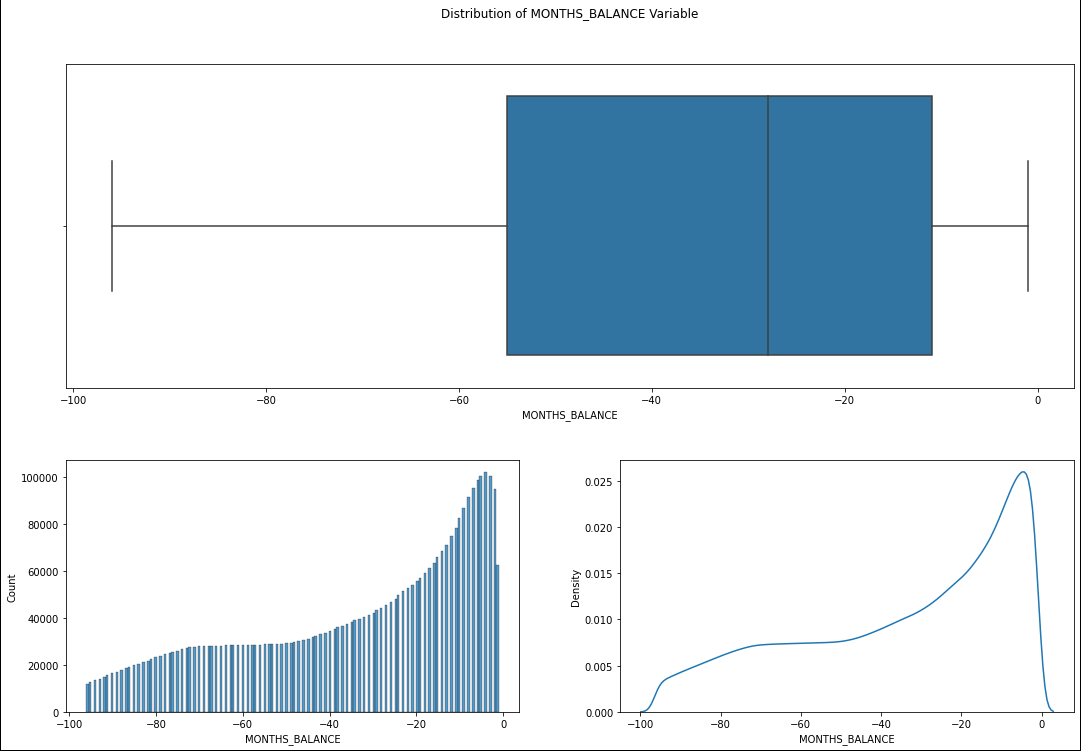

In [14]:
plotter.numeric_distribution(
    title = "Distribution of MONTHS_BALANCE Variable",
    data = cc_balance,
    num_col = "MONTHS_BALANCE"
)

<h4><div id="3.3.4">3.3.4 : Analyzing AMT_BALANCE Variable</div></h4>

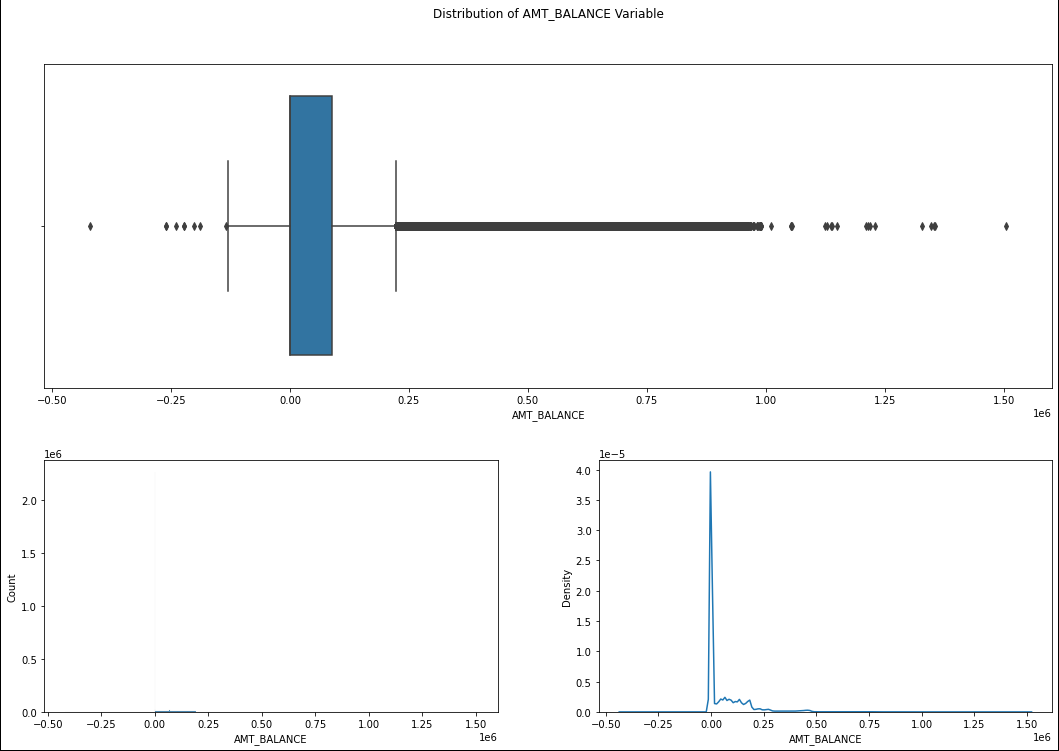

In [15]:
plotter.numeric_distribution(
    title = "Distribution of AMT_BALANCE Variable",
    data = cc_balance,
    num_col = "AMT_BALANCE"
)

<h4><div id="3.3.5">3.3.5 : Analyzing AMT_CREDIT_LIMIT_ACTUAL Variable</div></h4>

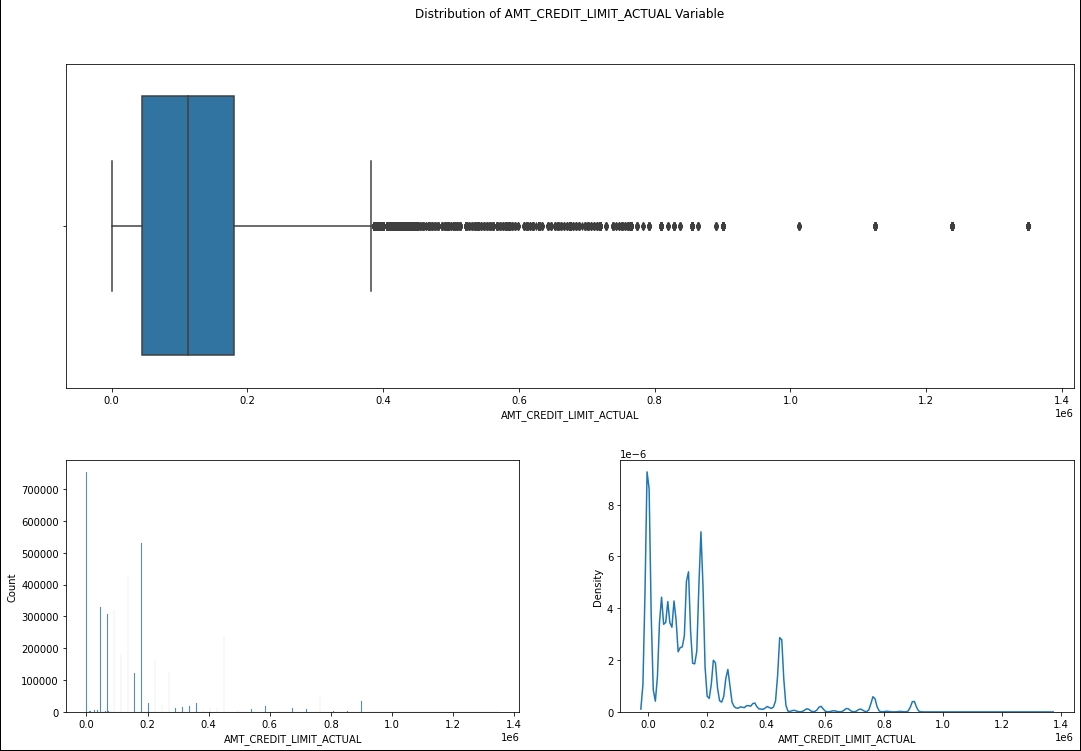

In [16]:
plotter.numeric_distribution(
    title = "Distribution of AMT_CREDIT_LIMIT_ACTUAL Variable",
    data = cc_balance,
    num_col = "AMT_CREDIT_LIMIT_ACTUAL"
)

<h4><div id="3.3.6">3.3.6 : Analyzing AMT_DRAWINGS_ATM_CURRENT Variable</div></h4>

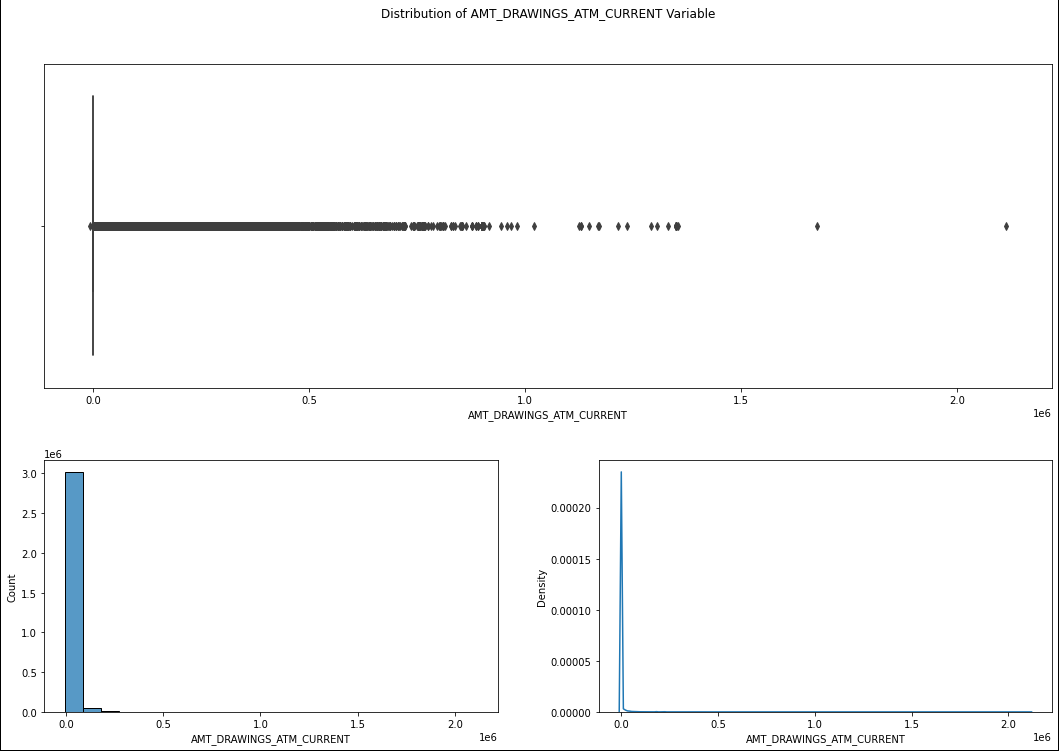

In [17]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_ATM_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_ATM_CURRENT"
)

<h4><div id=3.3.7>3.3.7 : Analyzing AMT_DRAWINGS_CURRENT Variable</div></h4>

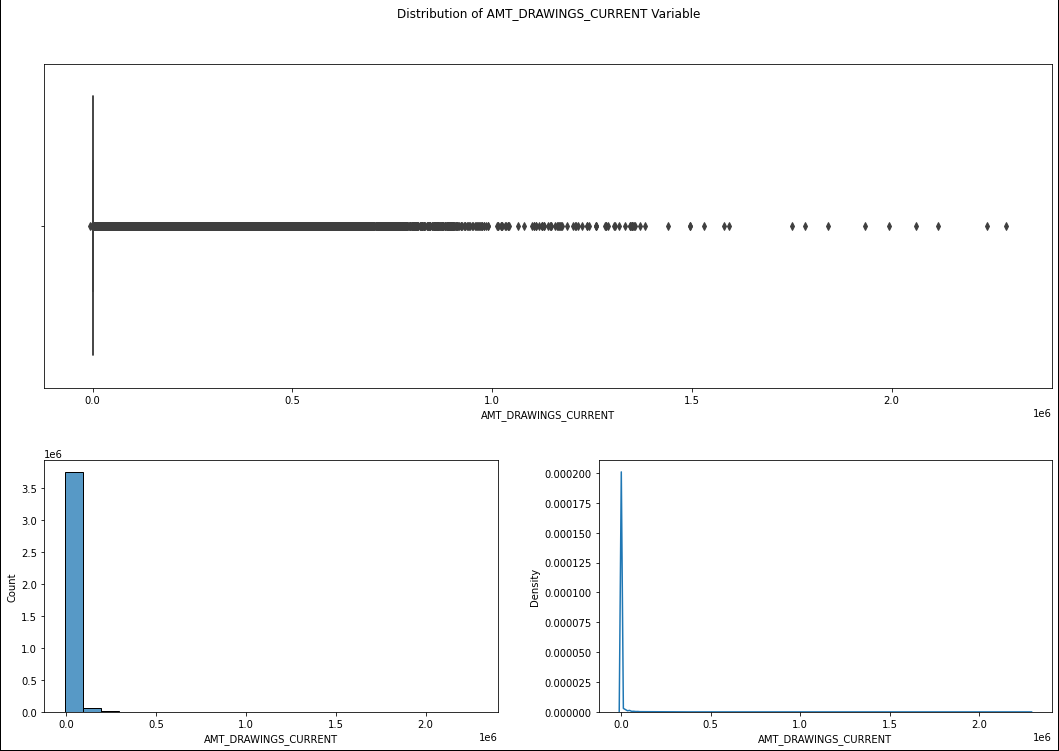

In [18]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_CURRENT"
)

<h4><div id=3.3.8>3.3.8 : Analyzing AMT_DRAWINGS_OTHER_CURRENT Variable</div></h4>

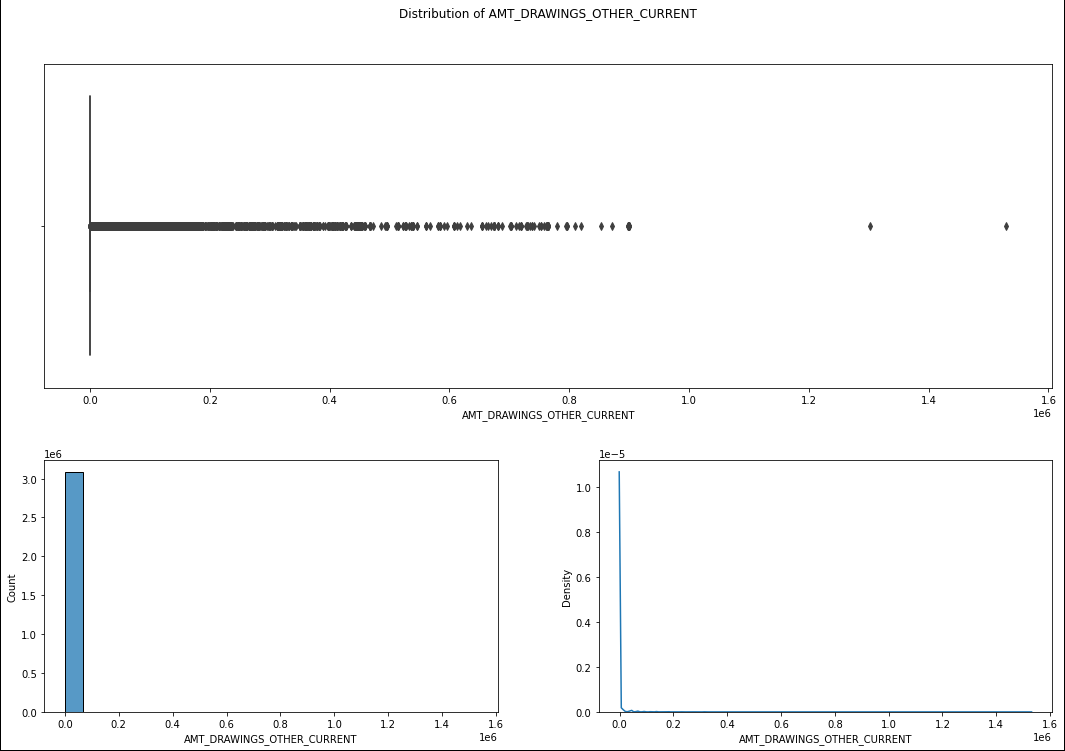

In [19]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_OTHER_CURRENT",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_OTHER_CURRENT"
)

<h4><div id=3.3.9>3.3.9 : Analyzing AMT_DRAWINGS_POS_CURRENT Variable</div></h4>

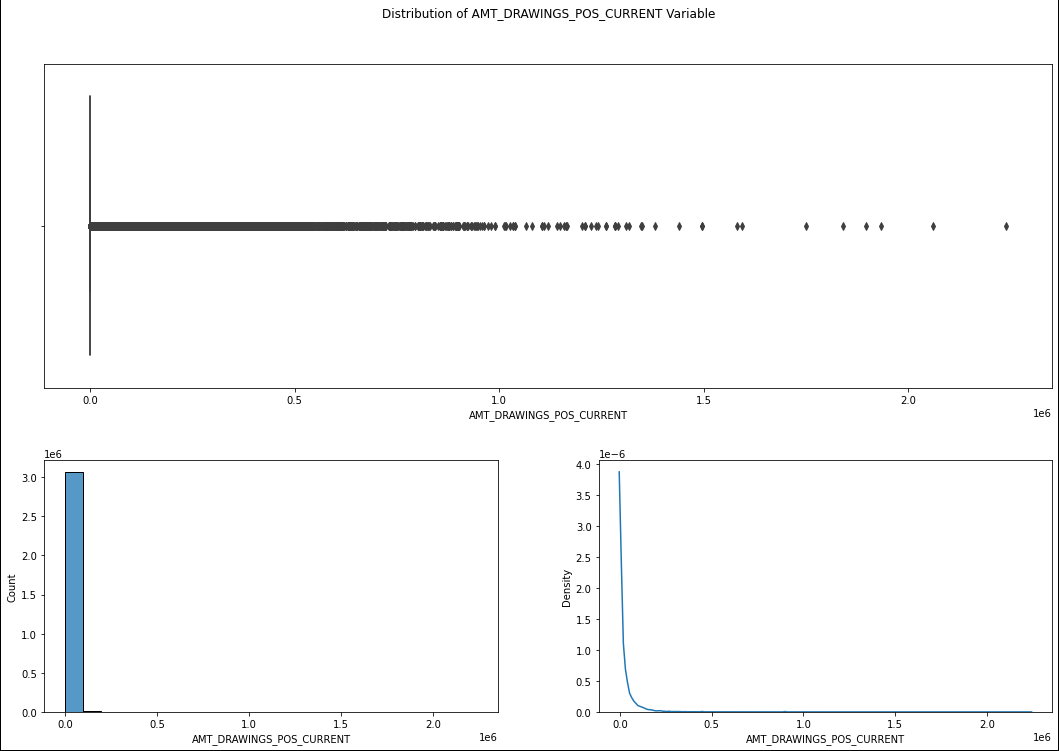

In [20]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_POS_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_POS_CURRENT"
)

<h4><div id=3.3.10>3.3.10 : Analyzing AMT_INST_MIN_REGULARITY Variable</div></h4>

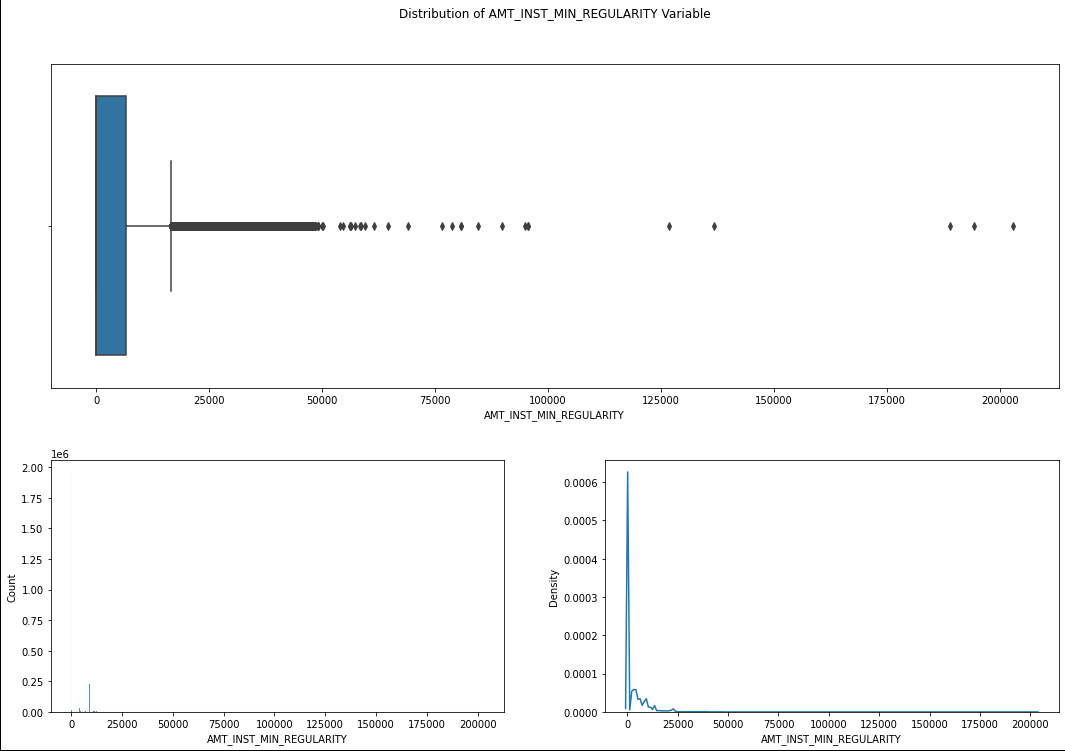

In [21]:
plotter.numeric_distribution(
    title = "Distribution of AMT_INST_MIN_REGULARITY Variable",
    data = cc_balance,
    num_col = "AMT_INST_MIN_REGULARITY"
)

<h4><div id=3.3.11>3.3.11 : Analyzing AMT_PAYMENT_CURRENT Variable</div></h4>

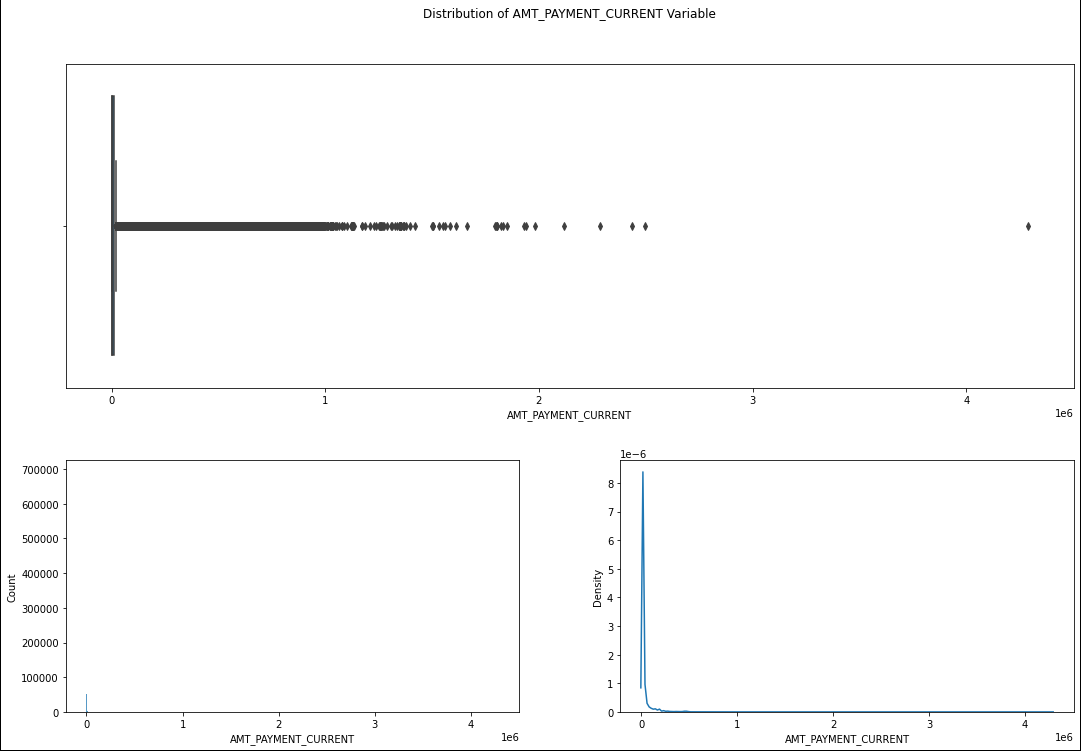

In [22]:
plotter.numeric_distribution(
    title = "Distribution of AMT_PAYMENT_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_PAYMENT_CURRENT"
)

<h4><div id=3.3.12>3.3.12 : Analyzing AMT_PAYMENT_TOTAL_CURRENT Variable</div></h4>

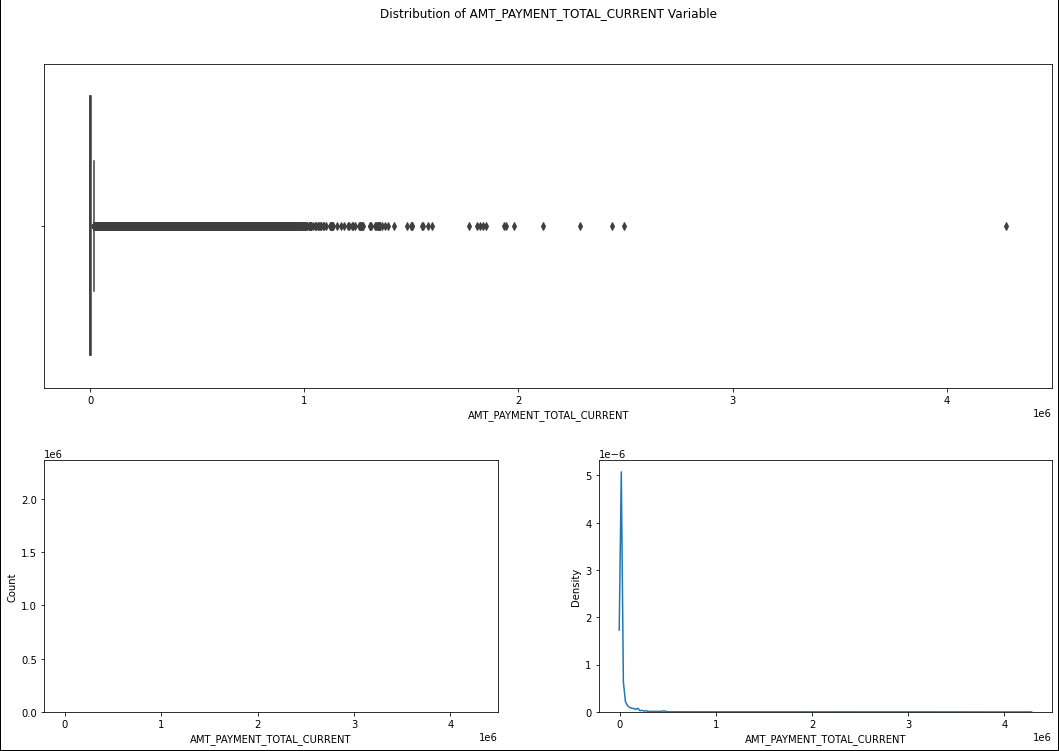

In [23]:
plotter.numeric_distribution(
    title = "Distribution of AMT_PAYMENT_TOTAL_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_PAYMENT_TOTAL_CURRENT"
)

<h4><div id=3.3.13>3.3.13 : Analyzing AMT_RECEIVABLE_PRINCIPAL Variable</div></h4>

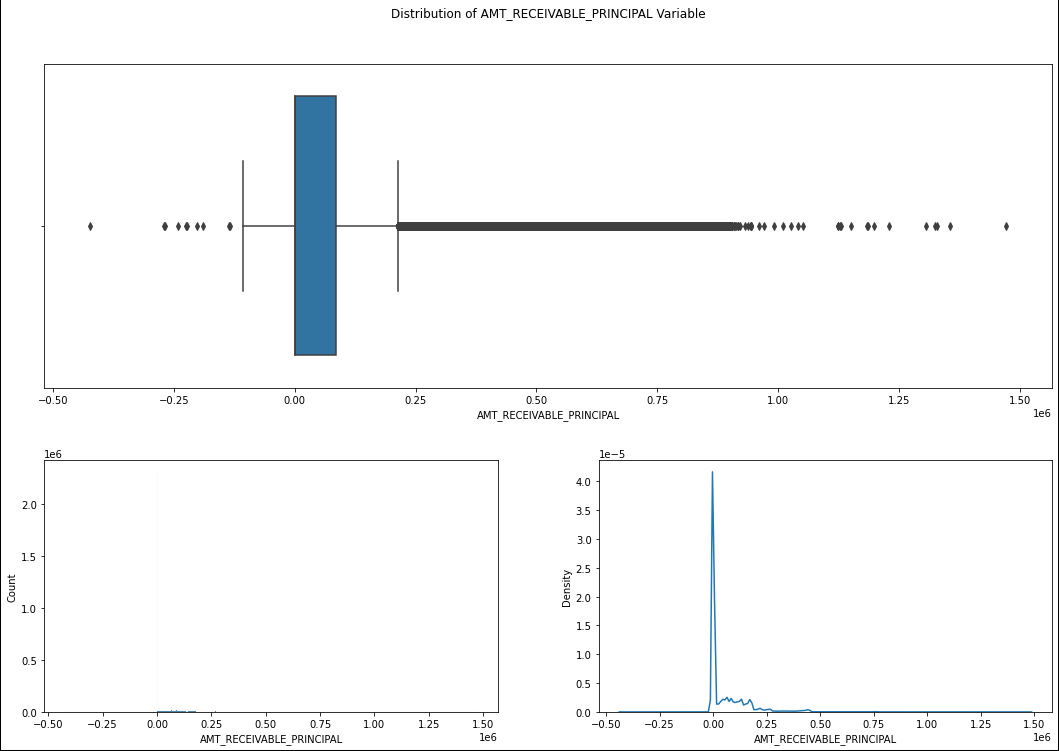

In [24]:
plotter.numeric_distribution(
    title = "Distribution of AMT_RECEIVABLE_PRINCIPAL Variable",
    data = cc_balance,
    num_col = "AMT_RECEIVABLE_PRINCIPAL"
)

<h4><div id=3.3.14>3.3.14 : Analyzing AMT_RECIVABLE Variable</div></h4>

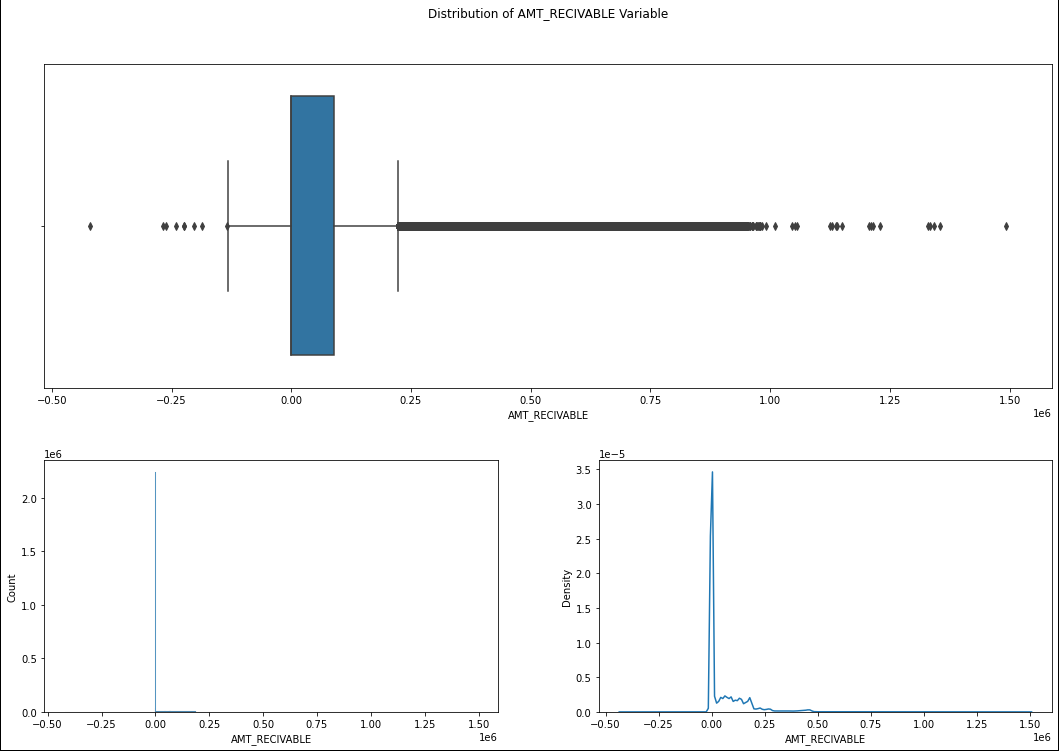

In [25]:
plotter.numeric_distribution(
    title = "Distribution of AMT_RECIVABLE Variable",
    data = cc_balance,
    num_col = "AMT_RECIVABLE"
)

<h4><div id=3.3.15>3.3.15 : Analyzing AMT_TOTAL_RECEIVABLE Variable</div></h4>

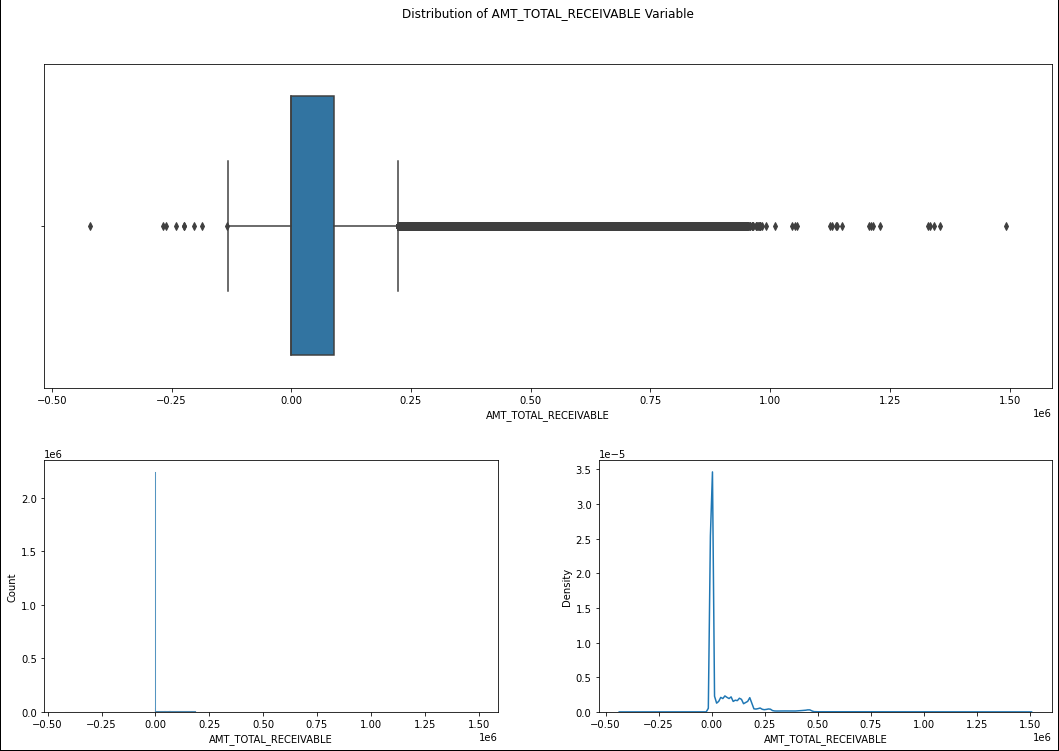

In [26]:
plotter.numeric_distribution(
    title = "Distribution of AMT_TOTAL_RECEIVABLE Variable",
    data = cc_balance,
    num_col = "AMT_TOTAL_RECEIVABLE"
)

<h4><div id=3.3.16>3.3.16 : Analyzing CNT_DRAWINGS_ATM_CURRENT Variable</div></h4>

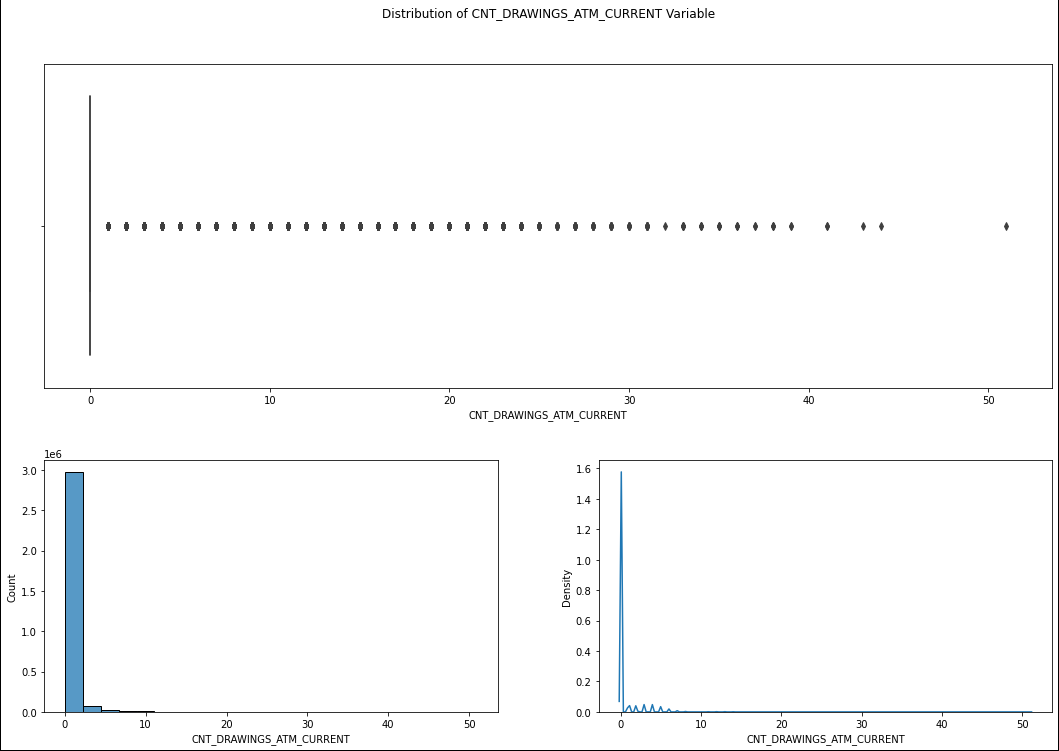

In [27]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_ATM_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_ATM_CURRENT"
)

<h4><div id=3.3.17>3.3.17 : Analyzing CNT_DRAWINGS_CURRENT Variable</div></h4>

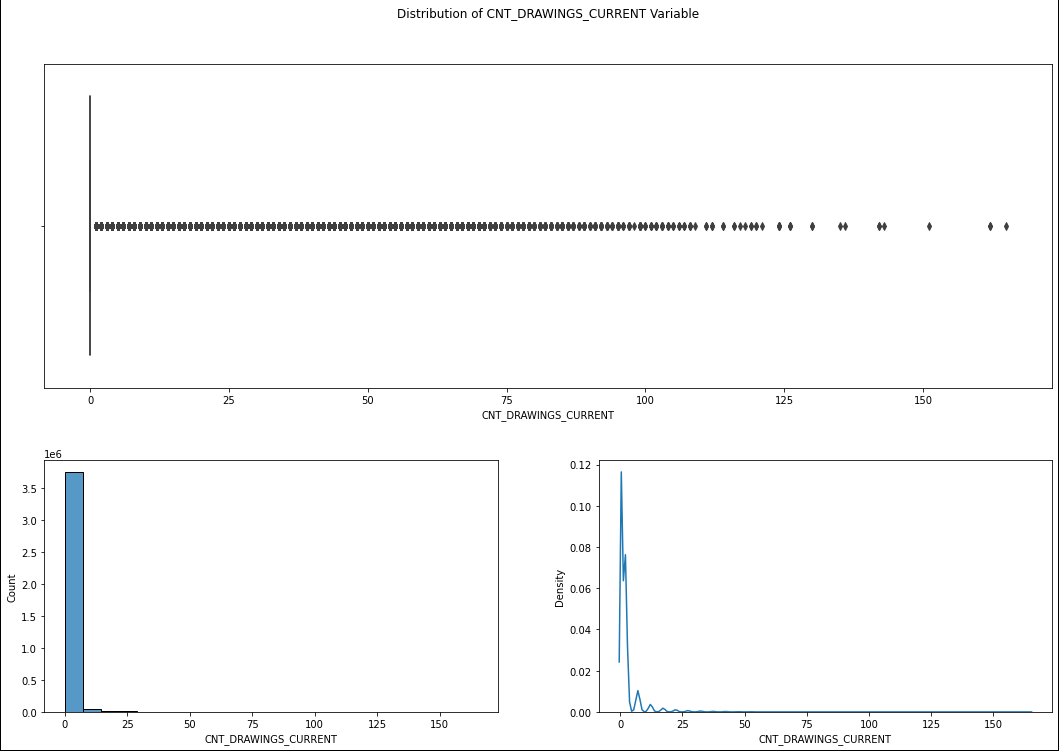

In [28]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_CURRENT"
)

<h4><div id=3.3.18>3.3.18 : Analyzing CNT_DRAWINGS_OTHER_CURRENT Variable</div></h4>

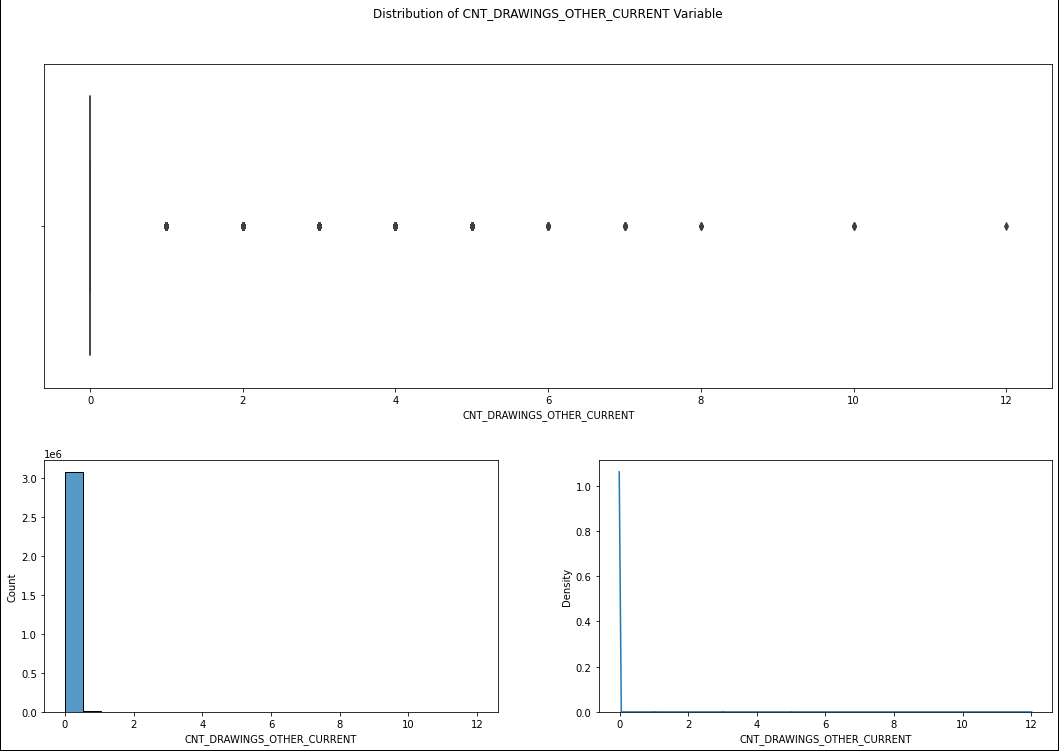

In [29]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_OTHER_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_OTHER_CURRENT"
)

<h4><div id=3.3.19>3.3.19 : Analyzing CNT_DRAWINGS_POS_CURRENT Variable</div></h4>

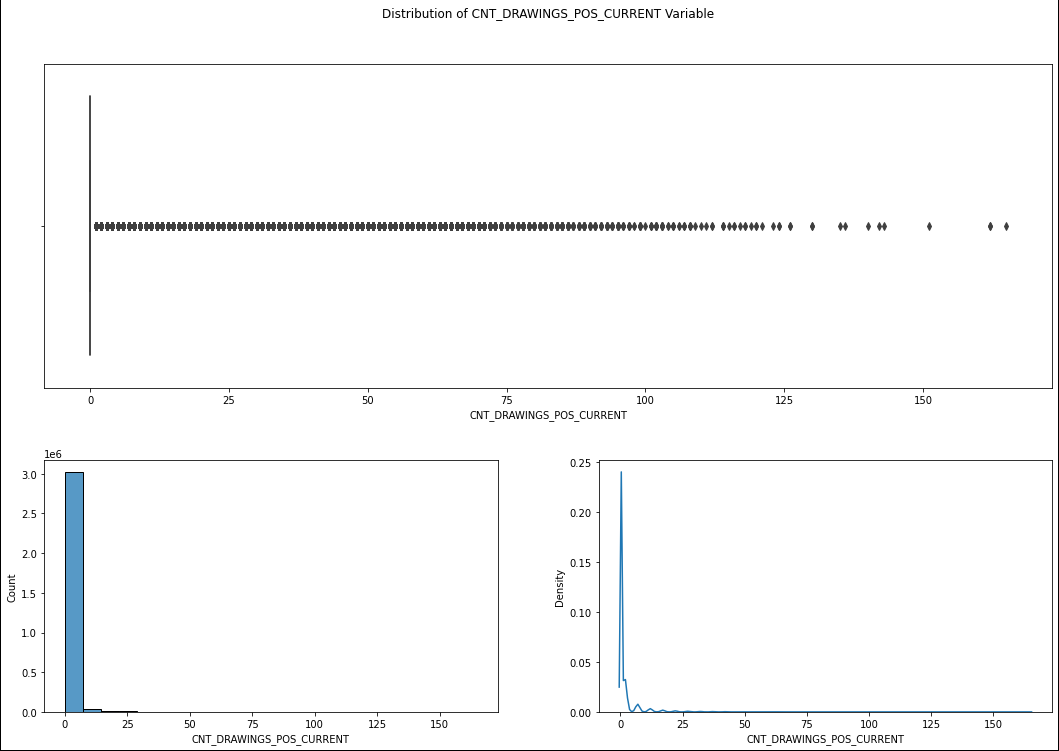

In [30]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_POS_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_POS_CURRENT"
)

<h4><div id=3.3.20>3.3.20 : Analyzing CNT_INSTALMENT_MATURE_CUM Variable</div></h4>

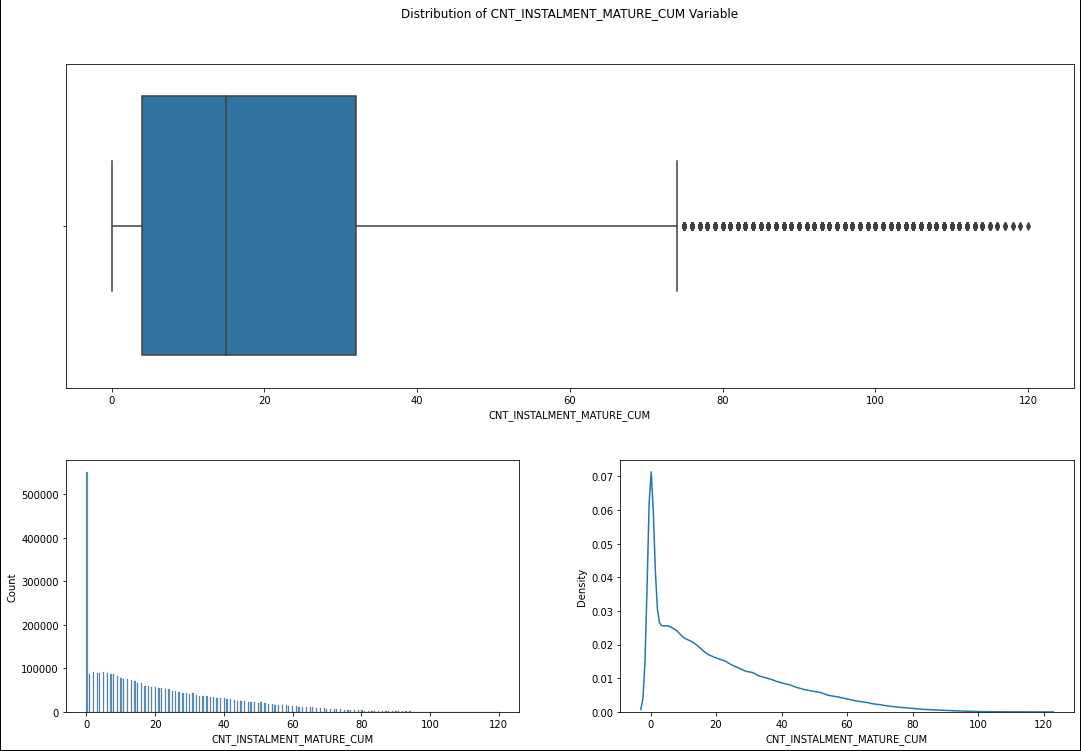

In [31]:
plotter.numeric_distribution(
    title = "Distribution of CNT_INSTALMENT_MATURE_CUM Variable",
    data = cc_balance,
    num_col = "CNT_INSTALMENT_MATURE_CUM"
)

<h4><div id=3.3.21>3.3.21 : Analyzing NAME_CONTRACT_STATUS Variable</div></h4>

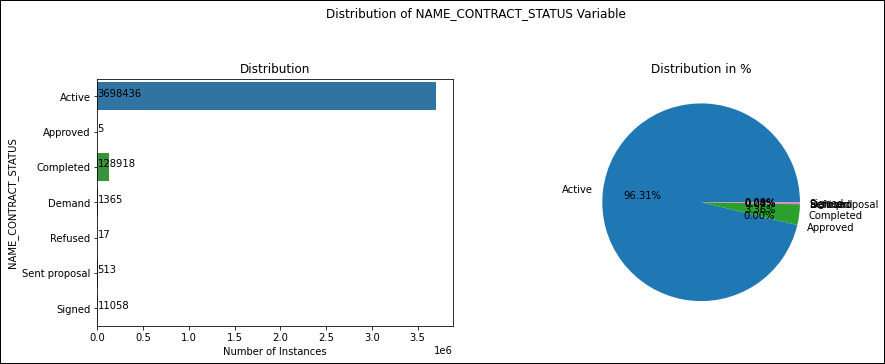

In [32]:
plotter.categorical_distribution(
    title = "Distribution of NAME_CONTRACT_STATUS Variable",
    series = cc_balance["NAME_CONTRACT_STATUS"],
)

<h4><div id=3.3.22>3.3.22 : Analyzing SK_DPD Variable</div></h4>

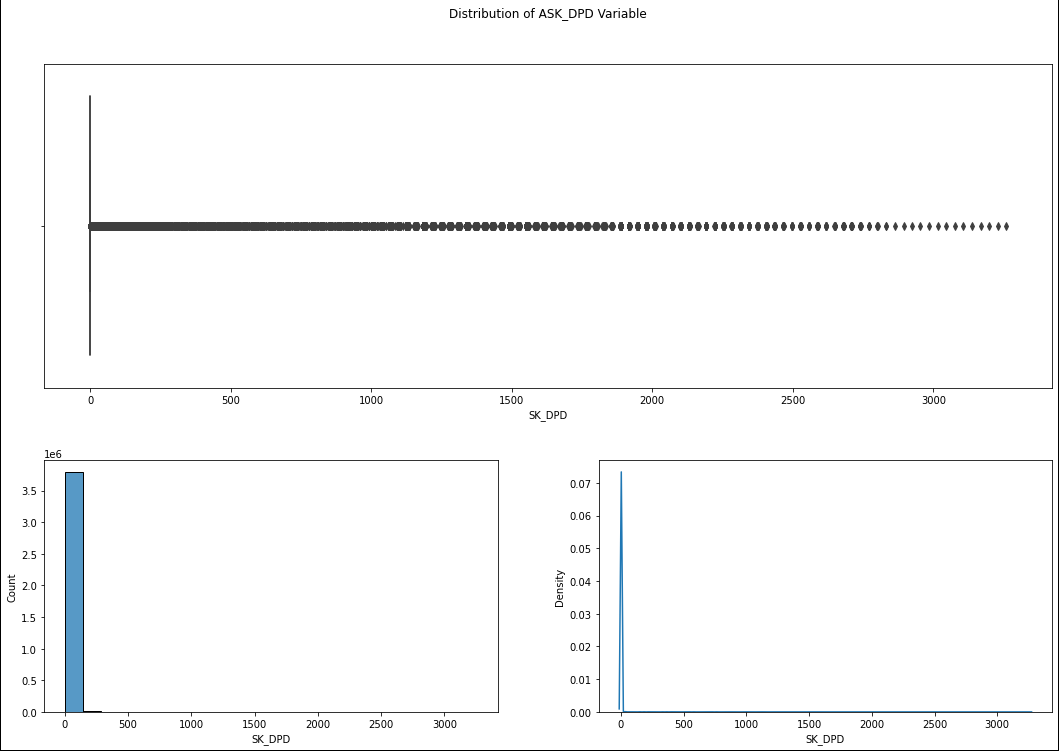

In [33]:
plotter.numeric_distribution(
    title = "Distribution of ASK_DPD Variable",
    data = cc_balance,
    num_col = "SK_DPD"
)

<h4><div id="3.3.23">3.3.23 : Analyzing SK_DPD_DEF Variable</div></h4>

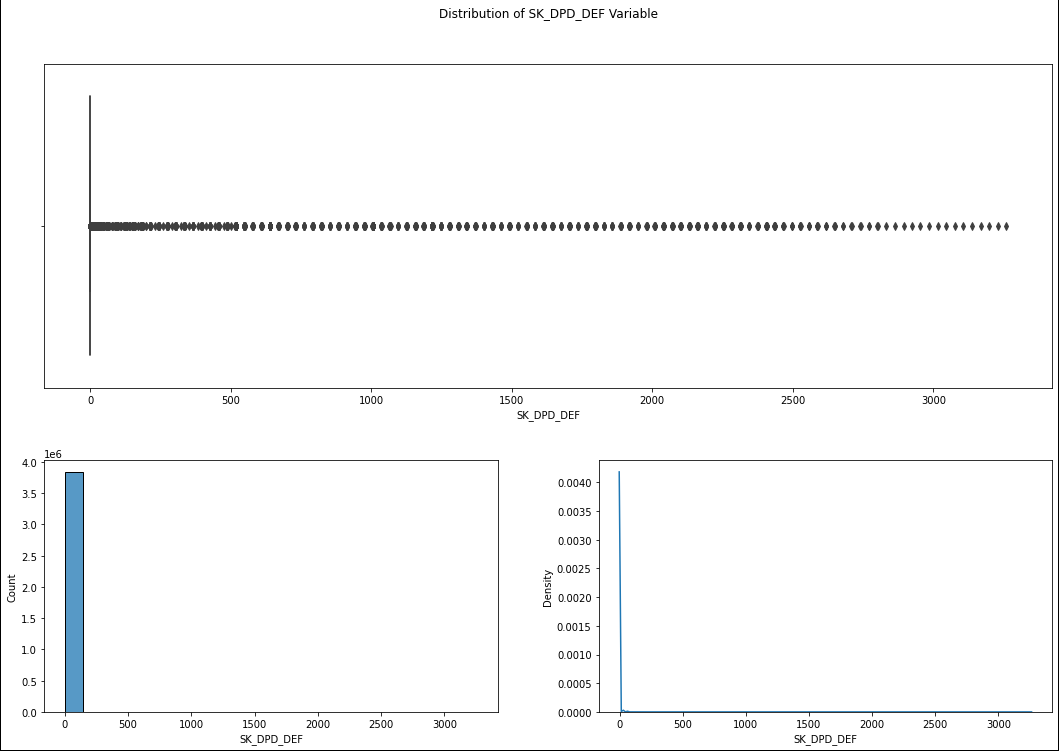

In [34]:
plotter.numeric_distribution(
    title = "Distribution of SK_DPD_DEF Variable",
    data = cc_balance,
    num_col = "SK_DPD_DEF"
)

<h3><div id="3.4">3.4 : Multivariate Analysis</div></h3>

In [35]:
ls = list(range(2,20))
ls.append(21)
ls.append(22)
ls

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22]

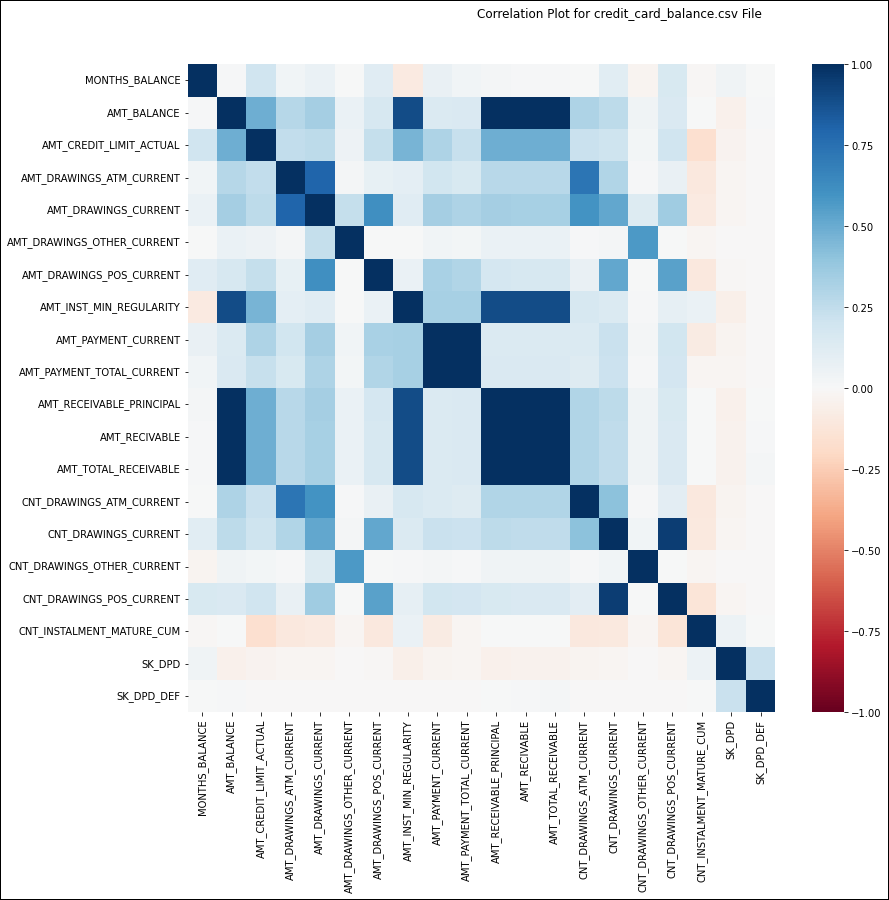

In [36]:
plotter.plot_num_num_corr(
    title = "Correlation Plot for credit_card_balance.csv File",
    data = cc_balance.iloc[:,ls]
)

<h2><div id="4">4 : Getting the Resultant Feature Space</div></h2>

In [37]:
import src.eda.visualization as plotter
import src.eda.tabular as tab
import src.fe.credit_card as cc_fe

In [38]:
cc_fs = cc_fe.get_features(cc_balance)
cc_fs.head()

,SK_ID_CURR,CREDIT_UTIL_RATIO,CC_DAYS_TOLERANCE,CC_PAY_RATIO,CC_INTEREST_RATE,CC_SURCHARGE,FLAG_CC_COMPLETED,FLAG_CC_SIGNED,FLAG_CC_REFUSED,FLAG_CC_APPROVED
SK_ID_PREV,,,,,,,,,,
1000018,394447.0,0.169091,0.0,1.620760,0.022679,0.0,0,0,0,0
1000030,361282.0,0.164513,0.0,0.241685,0.006971,0.0,0,0,0,0
1000031,131335.0,0.019191,0.0,9.498790,0.010792,0.0,0,0,0,0
1000035,436351.0,0.000000,0.0,NaN,NaN,NaN,0,0,0,0
1000077,181153.0,0.000000,0.0,NaN,NaN,NaN,0,0,0,0


<h3><div id="4.1">4.1 : Saving the Feature Space</div></h3>

In [39]:
cc_fs.to_csv(
    os.path.join(ROOT_DIR,"data","generated","cc_balance.csv")
)